In [ ]:
import pandas as pd
import os

# Assuming your Downloads folder is in the current working directory
file_path = '/content/Biomass Gasification Dataset.xlsx'
# Load the XLSX data into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify
print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1       

In [ ]:
# Find the number of columns and rows in the dataset

num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 244
Number of columns: 25


In [ ]:
# Determine the types of data in the columns

data_types = df.dtypes
print(data_types)

feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Reactor                    object
Catalyst Type              object
Catalyst Concentration    float64
CO2 mole fraction         float64
H2 mole fraction          float64
Hydrogen selectivity      float64
CO mole fraction          float64
CH4 mole fraction         float64
dtype: object


In [ ]:
# check for missing values

# Check for missing values using the `isnull()` method
missing_values = df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Print the columns with missing values and their count
print("Columns with missing values:")
print(missing_count[missing_count > 0])

Columns with missing values:
Series([], dtype: int64)


The second column represents the type of feed.

In [ ]:
# find the types of feed in the second column of data

# Extract the second column as a Series
second_column = df.iloc[:,1]  # Assuming the second column has index 1

# Get unique values from the second column
unique_strings = second_column.unique()

# Print the unique strings
print(unique_strings)

['Orange Peel' 'Banana Peel' 'Watermelon Peel' 'PET' 'wheat straw'
 'Crude Glycerol' 'Dunalila salina- CGLY 4%' 'Esperolina Plantis- CGLY 4%'
 'Chulorala Valgaris- CGLY 4%' 'Dunalila salina- Dionized Water'
 'Esperolina Plantis- Dionized Water' 'Chulorala Valgaris-Dionized Water'
 'Wood' 'Black Liquor' 'Black Liquor- Wood 3%' 'Black Liqour- Wood 5%'
 'Black Liquor- Wood 7%' 'Black Liquor- Wood 3%- Formic Acid'
 'Black Liquor- Wood 5%- Formic Acid' 'Black Liquor- Wood 7%- Formic Acid'
 'Distillition Waste water' 'Dairy Waste water based on Cheese'
 'Dairy Waste water based on Milk' 'Food Waste(Kitchen)']


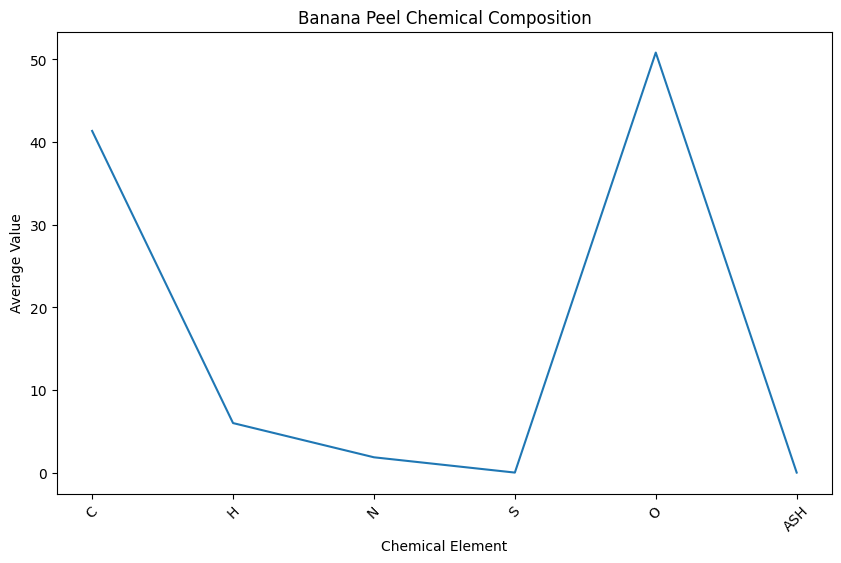

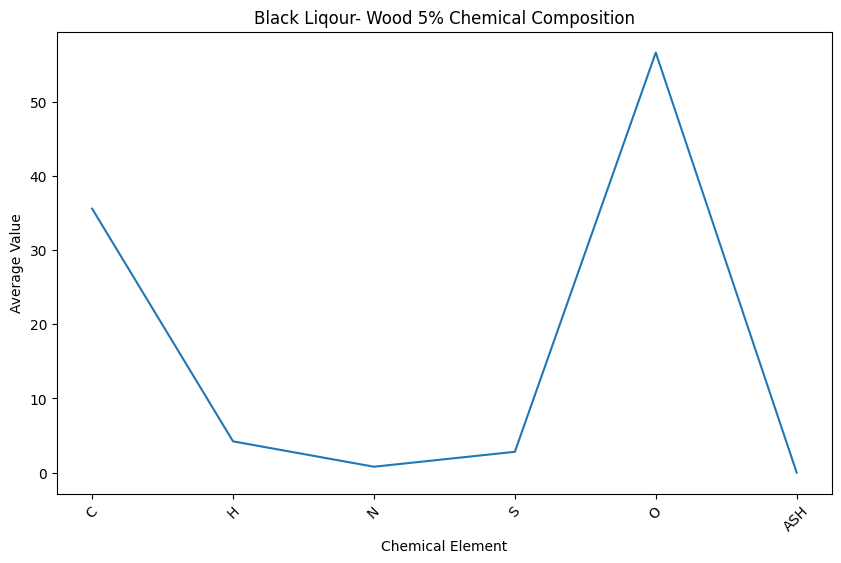

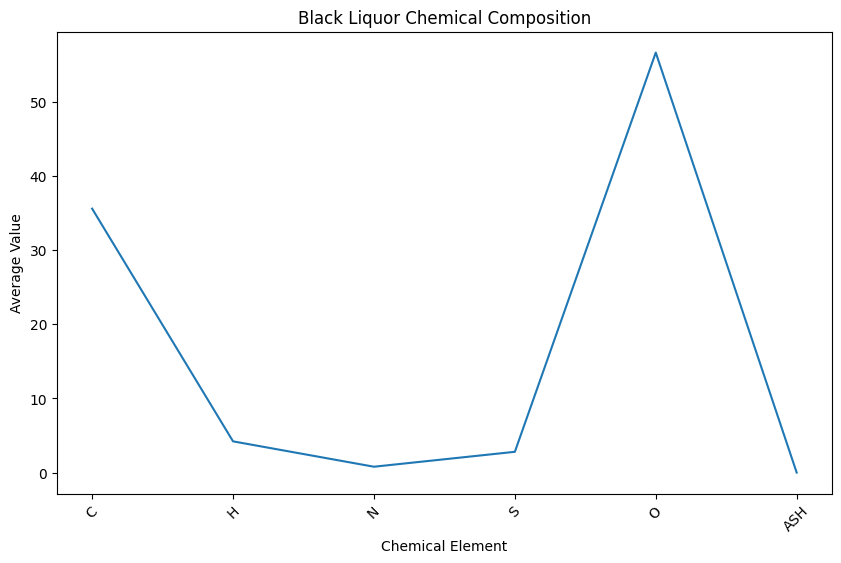

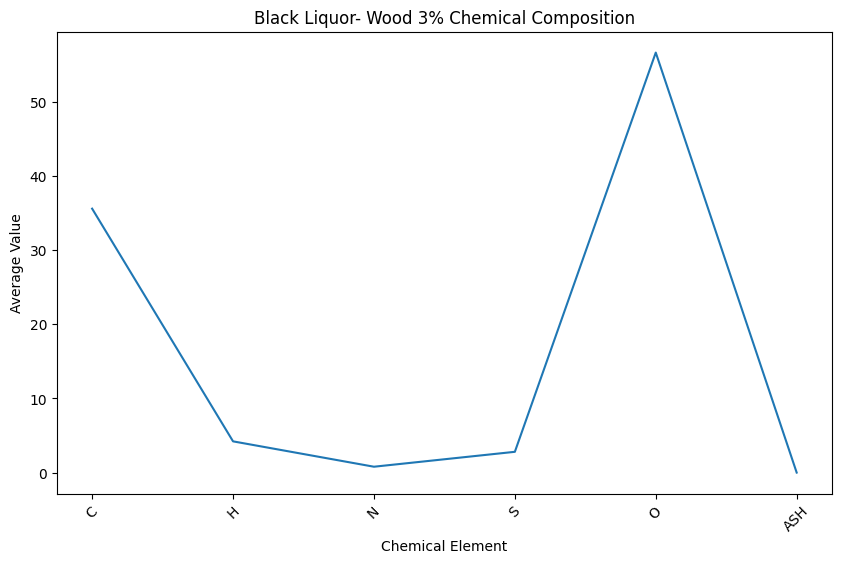

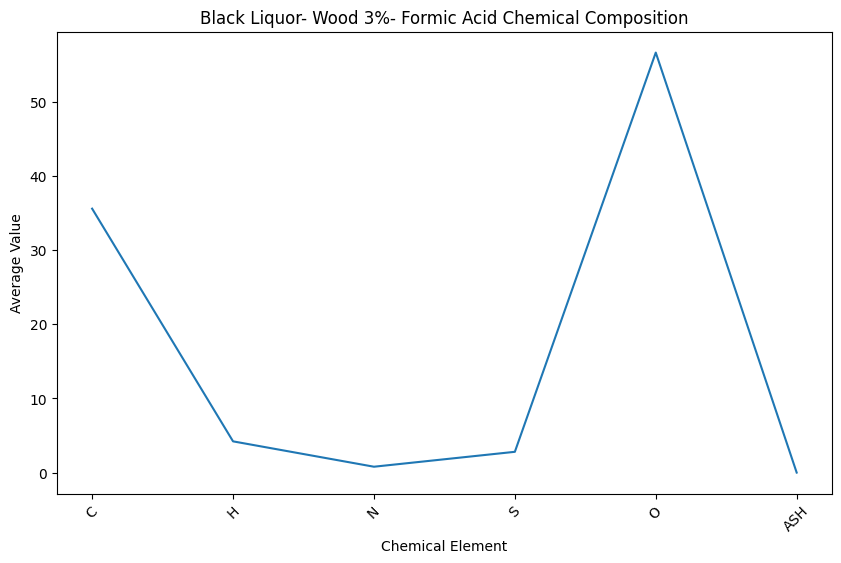

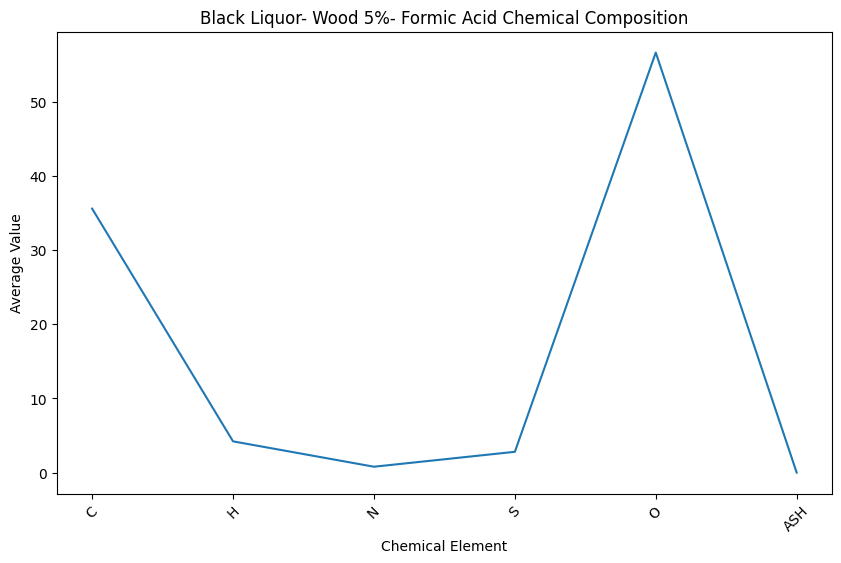

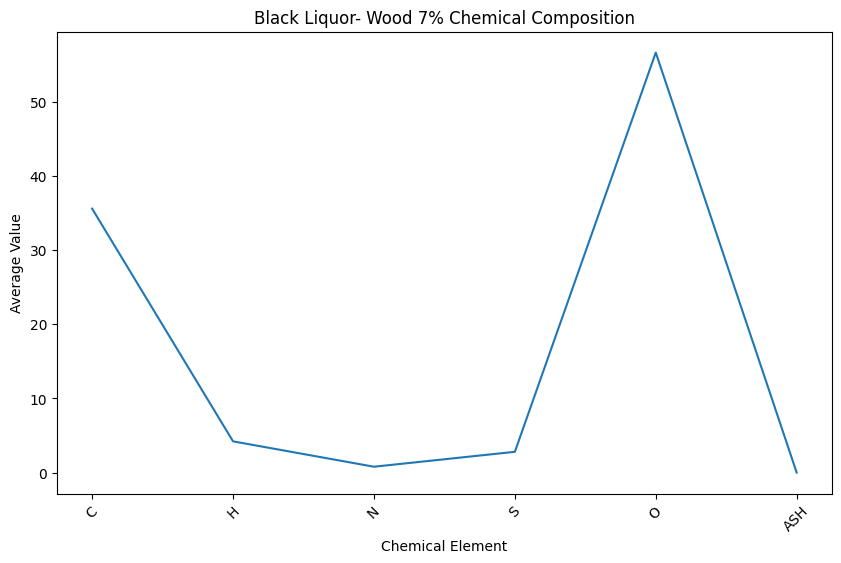

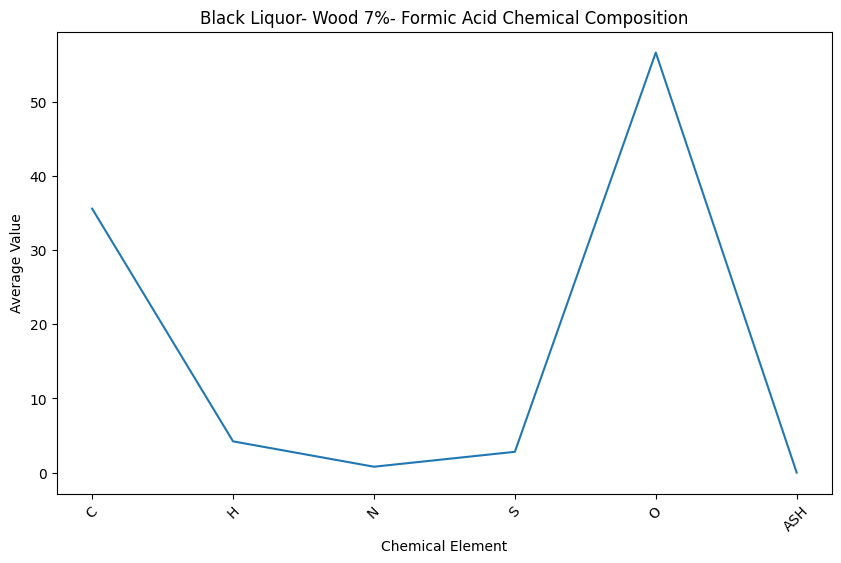

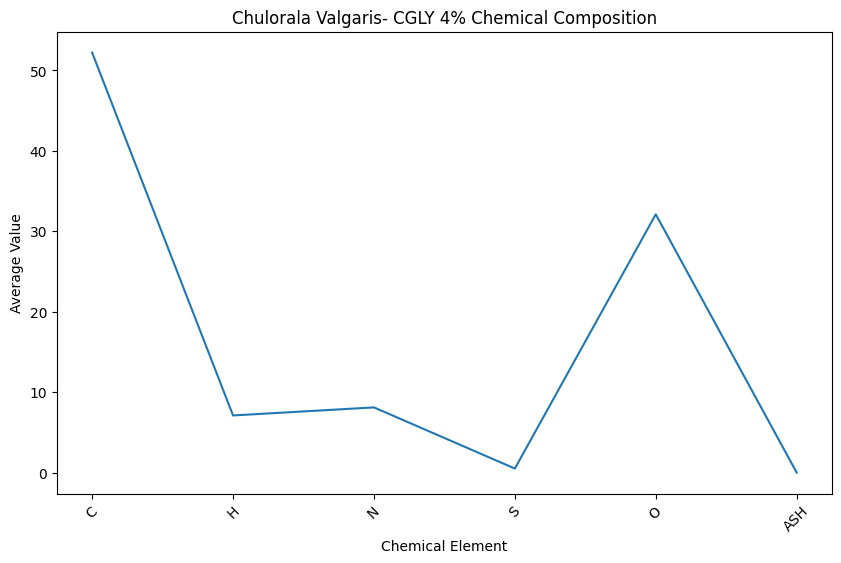

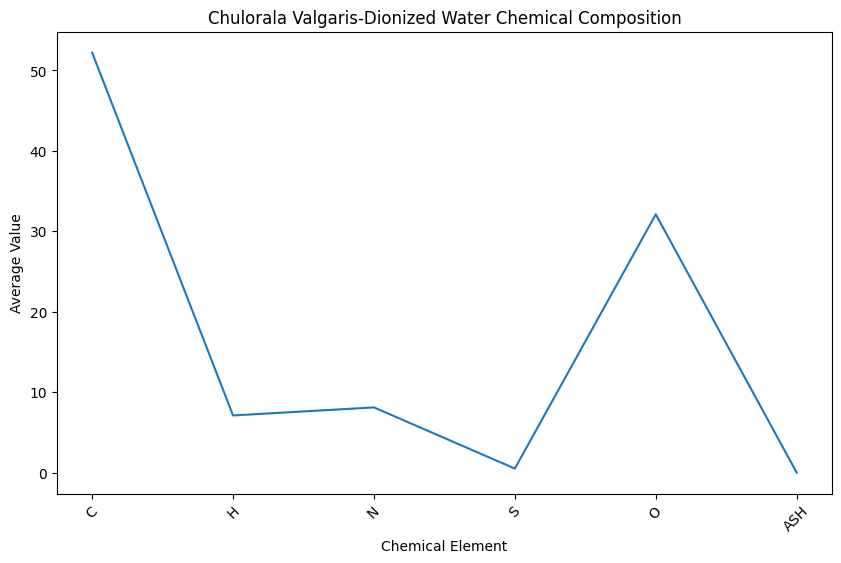

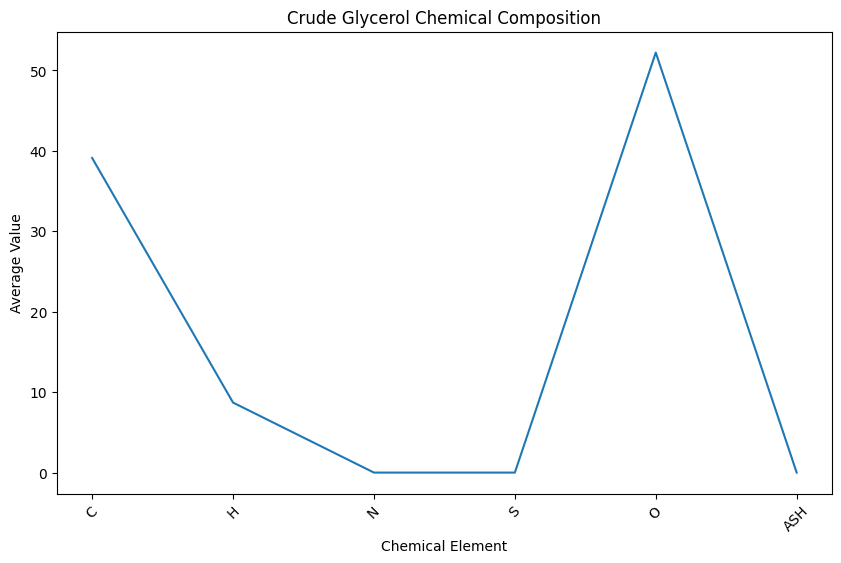

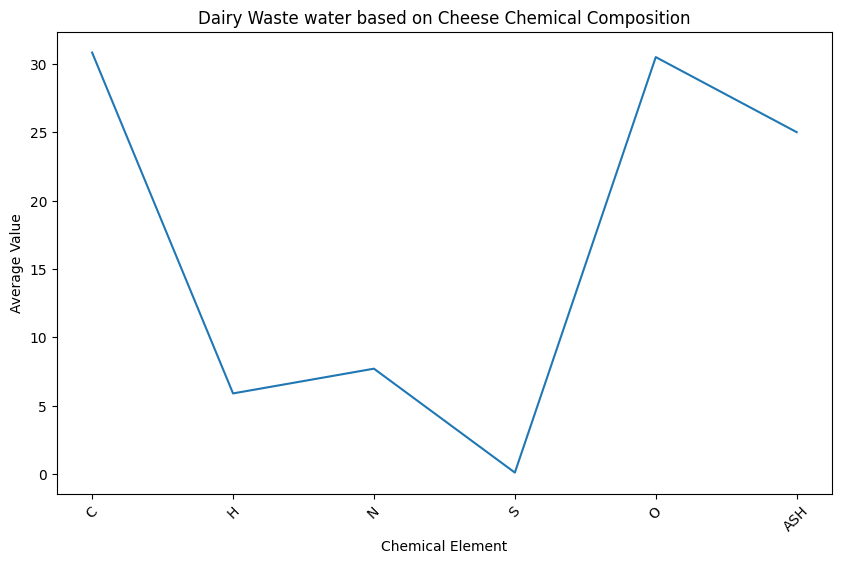

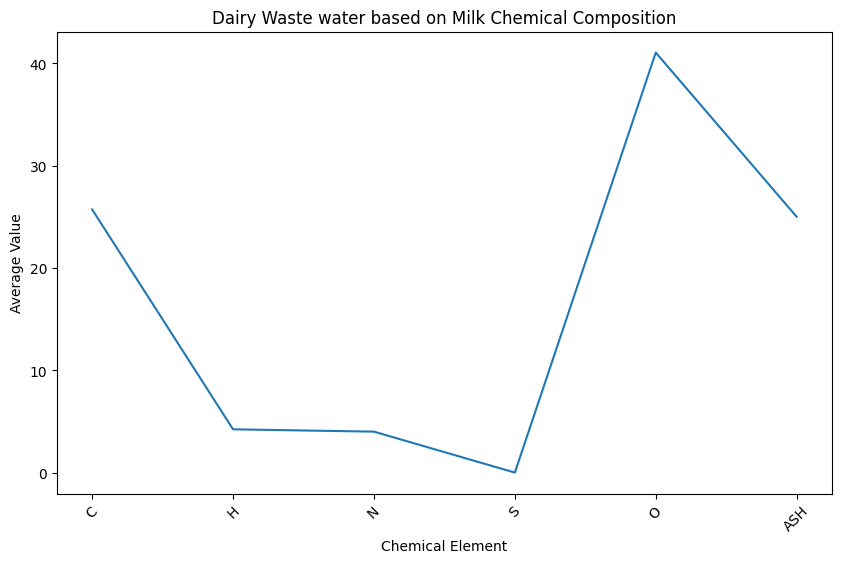

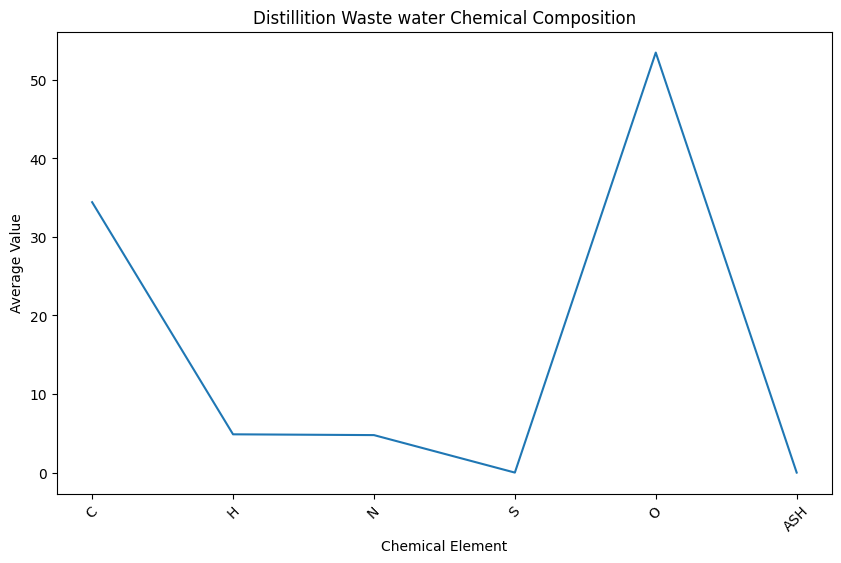

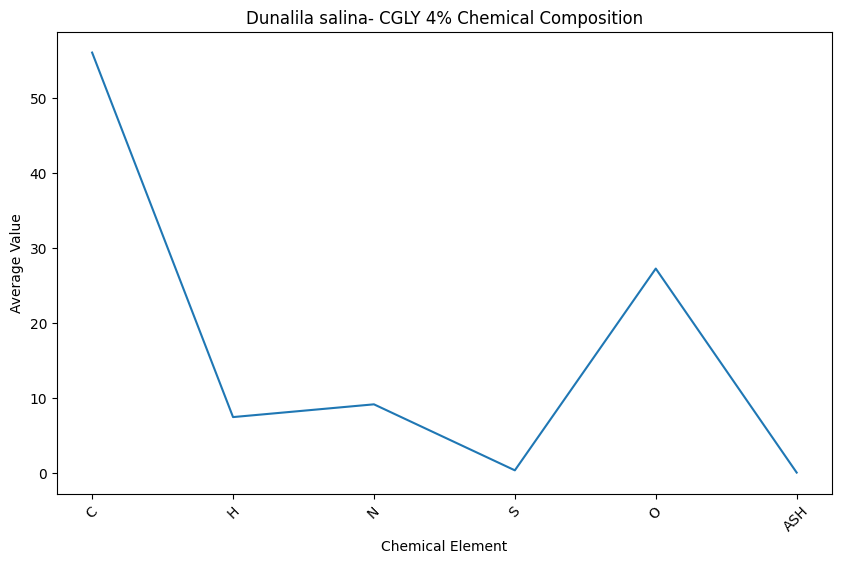

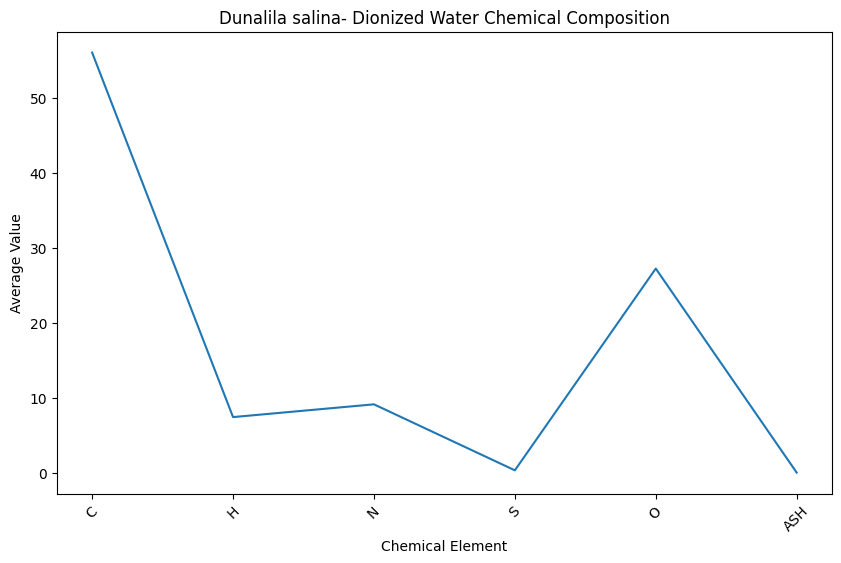

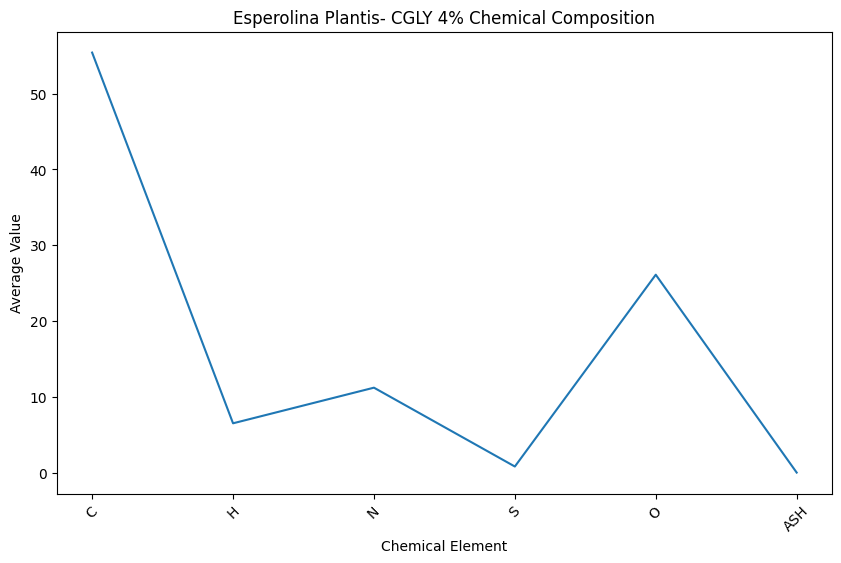

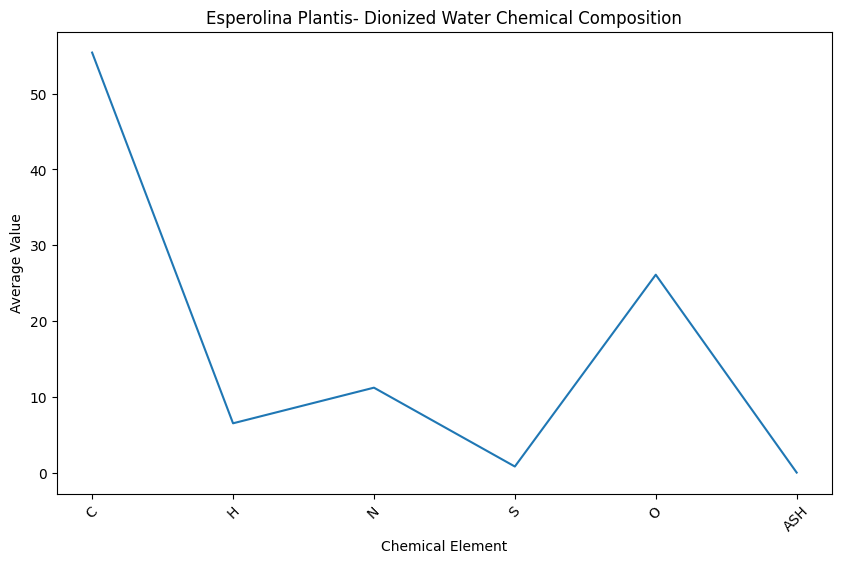

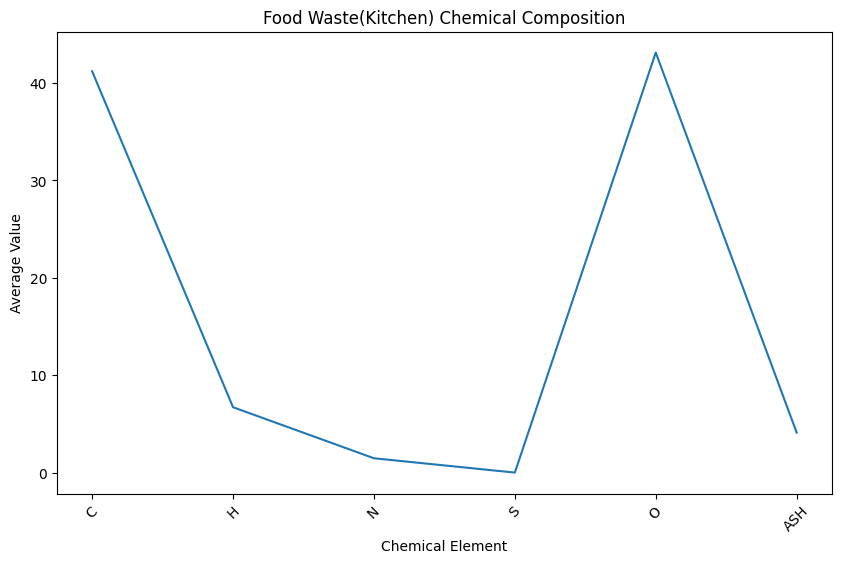

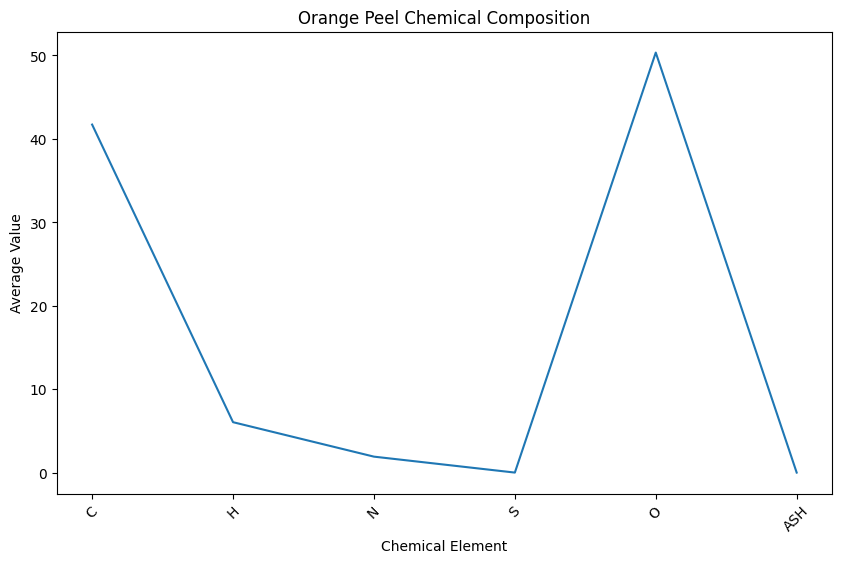

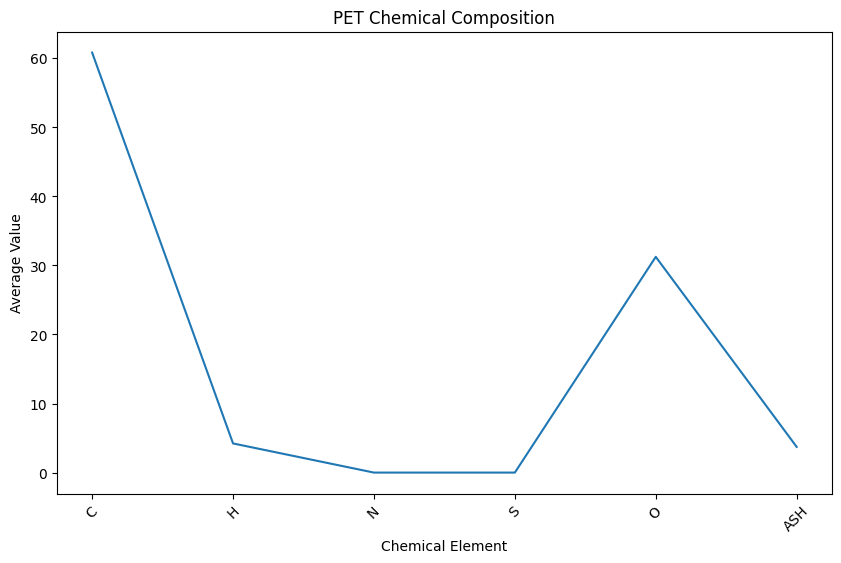

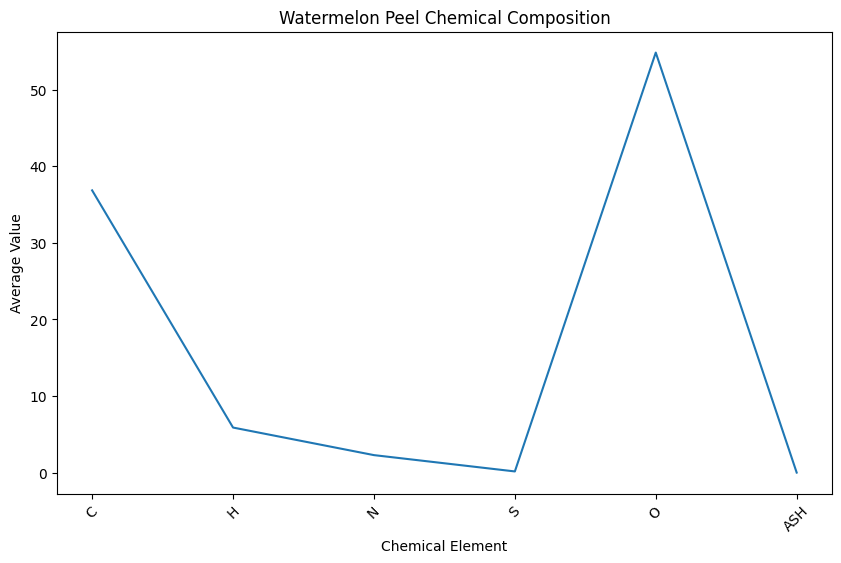

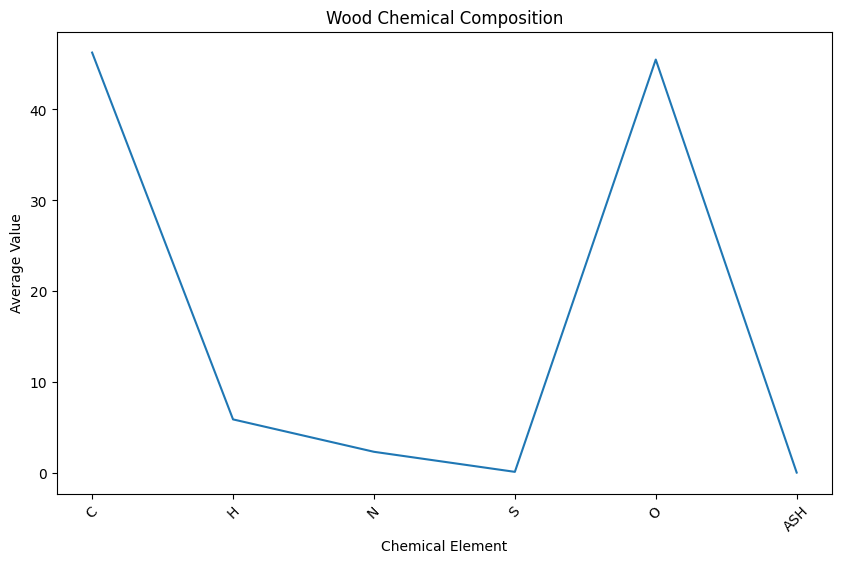

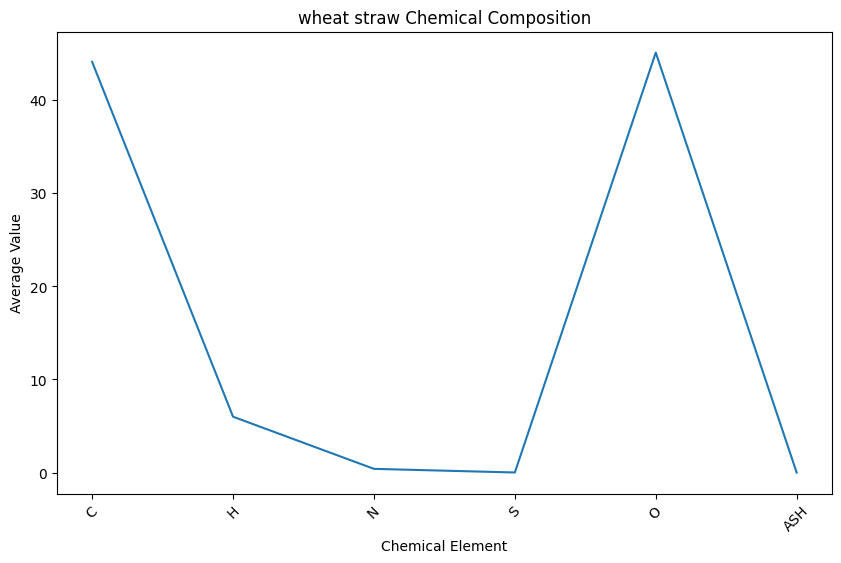

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the columns of interest are present
columns_to_graph = ['C', 'H', 'N', 'S', 'O', 'ASH', 'Type of Feed']

# Filter the DataFrame for the relevant columns
df_filtered = df[columns_to_graph]

# Group the data by "Type of Feed" and calculate the mean for each chemical element
grouped_data = df_filtered.groupby('Type of Feed')[['C', 'H', 'N', 'S', 'O', 'ASH']].mean()

# Iterate through each unique "Type of Feed" and create a plot
for feed_type, data in grouped_data.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values)
    plt.title(f"{feed_type} Chemical Composition")
    plt.xlabel("Chemical Element")
    plt.ylabel("Average Value")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Find the minimum value
min_temp = df['Temp'].min()

# Find the maximum value
max_temp = df['Temp'].max()

# Find the average value
avg_temp = df['Temp'].mean()

# Print the results
print("Minimum temperature:", min_temp)
print("Maximum temperature:", max_temp)
print("Average temperature:", avg_temp)

Minimum temperature: 80
Maximum temperature: 400
Average temperature: 369.36475409836066


# The redundant column is the reactor type. we want to drop it because it's not useful data

In [ ]:
# Drop the "Reactor" column
df = df.drop(columns='Reactor')

In [ ]:
# Create a new column for the ratio of O to H
df['C_H_ratio'] = df['C'] / df['H']

# Create a new column for the ratio of H to O
df['O_H_ratio'] = df['O'] / df['H']

In [ ]:
# Group the data by "Type of Feed" and calculate the minimum and maximum values
grouped_data = df.groupby('Type of Feed')[['C_H_ratio', 'O_H_ratio']].agg(['min', 'max'])

# Print the results
print(grouped_data)

                                    C_H_ratio             O_H_ratio           
                                          min        max        min        max
Type of Feed                                                                  
Banana Peel                          6.901503   6.901503   8.484140   8.484140
Black Liqour- Wood 5%                8.451306   8.451306  13.448931  13.448931
Black Liquor                         8.451306   8.451306  13.448931  13.448931
Black Liquor- Wood 3%                8.451306   8.451306  13.448931  13.448931
Black Liquor- Wood 3%- Formic Acid   8.451306   8.451306  13.448931  13.448931
Black Liquor- Wood 5%- Formic Acid   8.451306   8.451306  13.448931  13.448931
Black Liquor- Wood 7%                8.451306   8.451306  13.448931  13.448931
Black Liquor- Wood 7%- Formic Acid   8.451306   8.451306  13.448931  13.448931
Chulorala Valgaris- CGLY 4%          7.352113   7.352113   4.521127   4.521127
Chulorala Valgaris-Dionized Water    7.352113   7.35

NOTE THE NEW DATA FRAME IS DF_ENCODED FOR THE ONE HOT ENCODING

In [ ]:
# One-hot encode the "Type of Feed" column and create a new DataFrame
df_encoded = pd.get_dummies(df, columns=['Type of Feed'])

print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...    BC  Catalyst Type  \
0               1             1  ...   5.0              0   
1               1             1  ...   5.0              0   
2               1             1  ...  15.0              0   
3               1             1  ...  15.0              0   
4               1             1  ...  10.0              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1                     0.0              93.00              2.49   
2                     0.0       

The unencoded dataset if 26 columns while the encoded version is 49 columns. 23 columns were added

In [ ]:
# Check if the "Type of Feed" column is categorical
if df['Type of Feed'].dtype == 'object':
    print("The 'Type of Feed' column is categorical.")

# Check if the column has been one-hot encoded
if df['Type of Feed'].nunique() > 2:
    print("The 'Type of Feed' column has been one-hot encoded.")
else:
    print("The 'Type of Feed' column has not been one-hot encoded.")

The 'Type of Feed' column is categorical.
The 'Type of Feed' column has been one-hot encoded.


In [ ]:
num_columns = df.shape[1]

print("Number of columns:", num_columns)

Number of columns: 26


In [ ]:
import numpy as np

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Group the data by "Type of Feed" and apply outlier detection and replacement
for feed_type, group in df.groupby('Type of Feed'):
    for col in ['CO2 mole fraction', 'H2 mole fraction', 'CO mole fraction']:
        outliers = detect_outliers_iqr(group[col])
        group.loc[outliers, col] = group[col][~outliers].median()

# Update the original DataFrame
df = pd.concat(group for _, group in df.groupby('Type of Feed'))

To handle outliers in gas mole fractions, i found the median of the name's gas mole fraction and replaced the outliers with the median

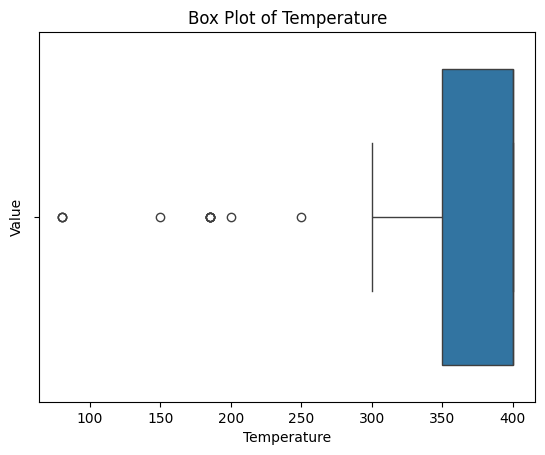

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Create the box plot using Seaborn
sns.boxplot(data=df, x='Temp')

# Set the title and labels
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Value')

# Show the plot
plt.show()

75% of temperatures are between 350 and 400 K. The only outliers are under 300 K.

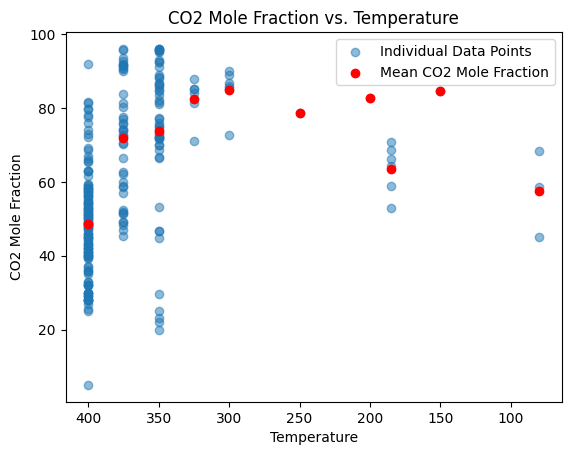

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Group the data by "Temp" and calculate the mean "CO2 mole fraction"
grouped_data = df.groupby('Temp')['CO2 mole fraction'].mean()

# Create the scatter plot
plt.scatter(df['Temp'], df['CO2 mole fraction'], alpha=0.5, label='Individual Data Points')

# Plot the mean points
plt.scatter(grouped_data.index, grouped_data.values, color='red', label='Mean CO2 Mole Fraction')

# Set the title, labels, and legend
plt.title('CO2 Mole Fraction vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('CO2 Mole Fraction')
plt.legend()

plt.gca().invert_xaxis()

# Show the plot
plt.show()

The corelation is that CO2 does not a strong correlation with temperature. Mabe as CO2 concentration increases, the temperature increases

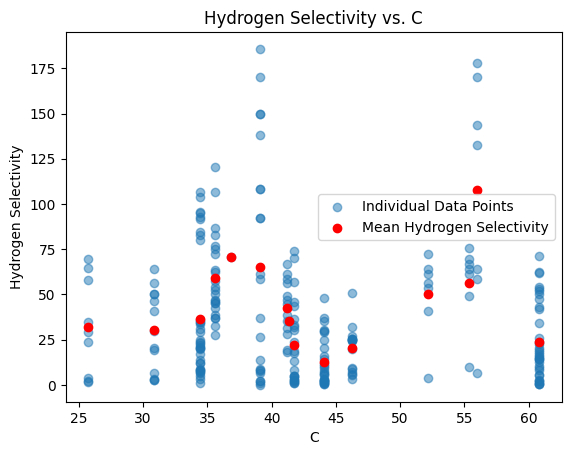

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Group the data by "C" and calculate the mean "Hydrogen selectivity"
grouped_data = df.groupby('C')['Hydrogen selectivity'].mean()

# Create the scatter plot
plt.scatter(df['C'], df['Hydrogen selectivity'], alpha=0.5, label='Individual Data Points')

# Plot the mean points
plt.scatter(grouped_data.index, grouped_data.values, color='red', label='Mean Hydrogen Selectivity')

# Set the title, labels, and legend
plt.title('Hydrogen Selectivity vs. C')
plt.xlabel('C')
plt.ylabel('Hydrogen Selectivity')
plt.legend()

# Show the plot
plt.show()

We observe that there are peaks and vallies of hydrogen selectivity vs C.

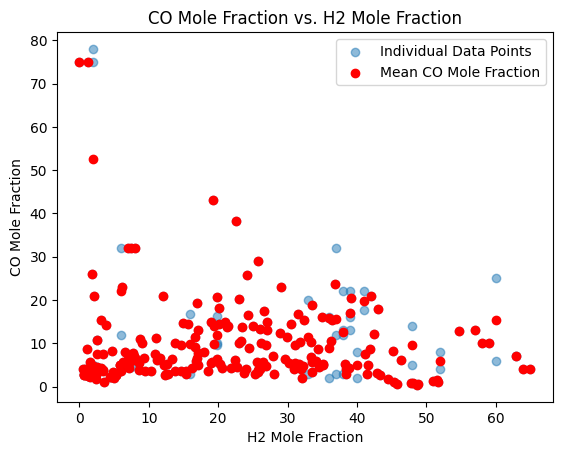

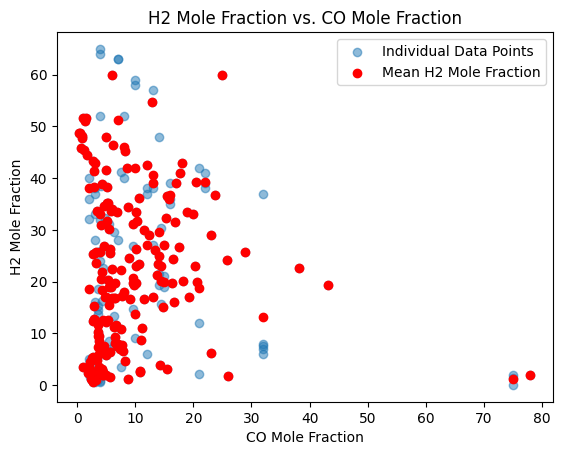

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Create scatter plot for CO mole fraction vs. H2 mole fraction
plt.scatter(df['H2 mole fraction'], df['CO mole fraction'], alpha=0.5, label='Individual Data Points')

# Group data by "H2 mole fraction" and calculate mean "CO mole fraction"
grouped_data = df.groupby('H2 mole fraction')['CO mole fraction'].mean()

# Plot mean points
plt.scatter(grouped_data.index, grouped_data.values, color='red', label='Mean CO Mole Fraction')

# Set title, labels, and legend
plt.title('CO Mole Fraction vs. H2 Mole Fraction')
plt.xlabel('H2 Mole Fraction')
plt.ylabel('CO Mole Fraction')
plt.legend()

# Show plot
plt.show()

# Create scatter plot for H2 mole fraction vs. CO mole fraction
plt.scatter(df['CO mole fraction'], df['H2 mole fraction'], alpha=0.5, label='Individual Data Points')

# Group data by "CO mole fraction" and calculate mean "H2 mole fraction"
grouped_data = df.groupby('CO mole fraction')['H2 mole fraction'].mean()

# Plot mean points
plt.scatter(grouped_data.index, grouped_data.values, color='red', label='Mean H2 Mole Fraction')

# Set title, labels, and legend
plt.title('H2 Mole Fraction vs. CO Mole Fraction')
plt.xlabel('CO Mole Fraction')
plt.ylabel('H2 Mole Fraction')
plt.legend()

# Show plot
plt.show()

Yes, as CO increases, the H decreases

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# Define the target variables
target_cols = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction']

# Extract features and target variables
X = df.drop(target_cols, axis=1)  # Features
y = df[target_cols]  # Target variables